In [1]:
# ignore_cell
# %load_ext lab_black

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-ticks")  # bmh, ggplot, seaborn-whitegrid
%matplotlib inline

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("svg")

## Installation

Before you can use motion, you will need to get it installed.
Motion itself is a pure Python package, but its dependencies are not.
The easiest way to get everything installed is to use [conda](https://conda.io/en/latest/miniconda.html).

To install motion with its recommended dependencies using the conda command line tool:

```bash
conda install -c conda-forge motion
```
Now that you have installed motion, you should be able to import it:

```python
import motion
```

!!! note
    Want to test motion from your browser and without installing anything?
    Try out our binder server: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/romainmartinez/motion/master)

## Quick overview

Here is a short introduction to xarray and motion, geared mainly for new users.
You should be able to follow along and complete this short example in 10 about minutes.

We will carry out common tasks in biomechanics, including reading files, manipulating and processing data, making figures and writing files.

### Object creation

Let's begin by creating a biomechanical data structure with motion.
In this tutorial, we will analyze the skin marker data available in this [`c3d file`](https://github.com/romainmartinez/motion/blob/master/tests/data/markers_analogs.c3d).

Motion provides the `from_c3d` function to read `c3d` files.
As we want to analyse markers data, we will use the `Markers` class:

In [2]:
from motion import Markers

data_path = "../tests/data/markers_analogs.c3d"
markers = Markers.from_c3d(data_path, prefix_delimiter=":")

Make sure to always have a check on the data after reading it.

When used in [Jupyter notebooks](https://jupyter.org/), data can be explored interactively.
A standard text representation is available otherwise.

In [3]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 51, time_frame: 580)>
array([[[  44.16278839,   44.16666412,   44.16487122, ...,
           99.22426605,   99.24201965,   99.25963593],
        [  32.57229614,   32.57104111,   32.56489563, ...,
           87.51286316,   87.52822876,   87.54118347],
        [ -93.72181702,  -93.72447968,  -93.72324371, ...,
          -41.1590271 ,  -41.14812851,  -41.12734985],
        ...,
        [ 562.26068115,  562.41027832,  562.56695557, ...,
          625.63555908,  625.98504639,  626.25811768],
        [ 568.24200439,  568.37792969,  568.49249268, ...,
          624.18139648,  624.51190186,  624.78894043],
        [ 568.44470215,  568.52038574,  568.59216309, ...,
          623.09222412,  623.44036865,  623.75152588]],

       [[-276.86193848, -276.86169434, -276.86407471, ...,
         -259.15292358, -259.16690063, -259.17092896],
        [-243.14048767, -243.14073181, -243.13331604, ...,
         -225.44718933, -225.45556641, -225.46226501],
        [ 124.78598022,  124.78731537,  124.78870392, ...,
          141.820755  ,  141.80741882,  141.80308533],
        ...,
        [ 638.35144043,  638.4241333 ,  638.50653076, ...,
          592.00372314,  592.15686035,  592.27819824],
        [ 626.79144287,  626.86114502,  626.90710449, ...,
          584.15661621,  584.27709961,  584.38830566],
        [ 651.37927246,  651.45532227,  651.49957275, ...,
          610.59655762,  610.72821045,  610.84472656]],

       [[ 675.69683838,  675.69873047,  675.6986084 , ...,
          903.97650146,  903.96801758,  903.980896  ],
        [ 676.57452393,  676.58099365,  676.57720947, ...,
          904.61694336,  904.61645508,  904.63104248],
        [ 674.27874756,  674.27947998,  674.28033447, ...,
          902.77349854,  902.77819824,  902.78143311],
        ...,
        [  81.34425354,   81.32899475,   81.2776413 , ...,
           53.45215607,   53.57727814,   53.72877121],
        [ 110.84020996,  110.81329346,  110.76582336, ...,
           83.92819214,   84.07093048,   84.20204163],
        [ 129.69673157,  129.6789856 ,  129.62939453, ...,
           99.39131165,   99.52735138,   99.68258667]],

       [[   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        ...,
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ]]])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
  * channel     (channel) <U14 'gauche_ext' 'gauche_int' ... 'MEDH' 'LATH'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 ... 5.76 5.77 5.78 5.79
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

In this case, we have generated a 3D array with the `axis`, `channel` and `time_frame` dimensions.

!!! note
    There are several ways to create objects in motion: by supplying data, from files of from other data structure.
    A more complete guide on object creation is available in the [objection creation](/object-creation) section of the documentation.

In [4]:
# ignore_cell
import xarray as xr
xr.set_options(display_style="text");

### Indexing

Since we have labels associated with each dimension, we have several kind of indexing available with varying levels of convenience and intuitiveness.
Let's see three ways to get the same data (ninth marker and first time frame).

#### Positional indexing

Indexing directly works just like it does for numpy arrays.

In [5]:
markers[:, 9, 0]

<xarray.DataArray 'markers' (axis: 4)>
array([753.43908691,  75.9487381 , 187.7590332 ,   1.        ])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'ASISl'
    time_frame  float64 0.0
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

#### Label-based indexing

Label-based indexing frees us from having to know how the data are organized.
We do not have to rely on dimension order and can use them explicitly to index the data.

The `isel` method is used when the dimension lookup is by name and the index lookup is by integer

In [6]:
markers.isel(channel=9, time_frame=0)

<xarray.DataArray 'markers' (axis: 4)>
array([753.43908691,  75.9487381 , 187.7590332 ,   1.        ])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'ASISl'
    time_frame  float64 0.0
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

The `isel` method is used when the dimension and index lookups are both by name.

In [7]:
markers.sel(channel="ASISl", time_frame=0)

<xarray.DataArray 'markers' (axis: 4)>
array([753.43908691,  75.9487381 , 187.7590332 ,   1.        ])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'ASISl'
    time_frame  float64 0.0
Attributes:
    first_frame:  0
    last_frame:   579
    rate:         100.0
    units:        mm

!!! note
    xarray offers extremely flexible indexing routines.
    For more details on indexing see the [xarray documentation](http://xarray.pydata.org/en/stable/indexing.html#indexing).

### Metadata

Biomechanical datasets are usually more than just raw numbers and have various metadata attributes.
Some metadata are already filled by motion and available in the `attrs` Python dictionnary.

In [8]:
markers.attrs

{'first_frame': 0, 'last_frame': 579, 'rate': 100.0, 'units': 'mm'}

They can be accessed using the standard dictionnary indexing

In [9]:
markers.attrs["rate"]

100.0

Or directly as a propriety

In [10]:
markers.rate

100.0

You can assign anything you wish.

In [11]:
markers.attrs["description"] = "Skin marker positions recorded in Montreal."
markers.attrs["participant_id"] = 12
markers.time_frame.attrs["units"] = "seconds"

In [12]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 51, time_frame: 580)>
array([[[  44.16278839,   44.16666412,   44.16487122, ...,
           99.22426605,   99.24201965,   99.25963593],
        [  32.57229614,   32.57104111,   32.56489563, ...,
           87.51286316,   87.52822876,   87.54118347],
        [ -93.72181702,  -93.72447968,  -93.72324371, ...,
          -41.1590271 ,  -41.14812851,  -41.12734985],
        ...,
        [ 562.26068115,  562.41027832,  562.56695557, ...,
          625.63555908,  625.98504639,  626.25811768],
        [ 568.24200439,  568.37792969,  568.49249268, ...,
          624.18139648,  624.51190186,  624.78894043],
        [ 568.44470215,  568.52038574,  568.59216309, ...,
          623.09222412,  623.44036865,  623.75152588]],

       [[-276.86193848, -276.86169434, -276.86407471, ...,
         -259.15292358, -259.16690063, -259.17092896],
        [-243.14048767, -243.14073181, -243.13331604, ...,
         -225.44718933, -225.45556641, -225.46226501],
        [ 124.78598022,  124.78731537,  124.78870392, ...,
          141.820755  ,  141.80741882,  141.80308533],
        ...,
        [ 638.35144043,  638.4241333 ,  638.50653076, ...,
          592.00372314,  592.15686035,  592.27819824],
        [ 626.79144287,  626.86114502,  626.90710449, ...,
          584.15661621,  584.27709961,  584.38830566],
        [ 651.37927246,  651.45532227,  651.49957275, ...,
          610.59655762,  610.72821045,  610.84472656]],

       [[ 675.69683838,  675.69873047,  675.6986084 , ...,
          903.97650146,  903.96801758,  903.980896  ],
        [ 676.57452393,  676.58099365,  676.57720947, ...,
          904.61694336,  904.61645508,  904.63104248],
        [ 674.27874756,  674.27947998,  674.28033447, ...,
          902.77349854,  902.77819824,  902.78143311],
        ...,
        [  81.34425354,   81.32899475,   81.2776413 , ...,
           53.45215607,   53.57727814,   53.72877121],
        [ 110.84020996,  110.81329346,  110.76582336, ...,
           83.92819214,   84.07093048,   84.20204163],
        [ 129.69673157,  129.6789856 ,  129.62939453, ...,
           99.39131165,   99.52735138,   99.68258667]],

       [[   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        ...,
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ],
        [   1.        ,    1.        ,    1.        , ...,
            1.        ,    1.        ,    1.        ]]])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
  * channel     (channel) <U14 'gauche_ext' 'gauche_int' ... 'MEDH' 'LATH'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 ... 5.76 5.77 5.78 5.79
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

### Computation

#### Arithmetic

As the underlying data-structure is a numpy array, xarray data arrays work the same way you would expect if you are used to numpy.

In [13]:
subset = markers[:, 0, :6]

In [14]:
subset + 10

<xarray.DataArray 'markers' (axis: 4, time_frame: 6)>
array([[  54.16278839,   54.16666412,   54.16487122,   54.16558075,
          54.17311096,   54.18517685],
       [-266.86193848, -266.86169434, -266.86407471, -266.86123657,
        -266.85812378, -266.85818481],
       [ 685.69683838,  685.69873047,  685.6986084 ,  685.69775391,
         685.7041626 ,  685.69592285],
       [  11.        ,   11.        ,   11.        ,   11.        ,
          11.        ,   11.        ]])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'gauche_ext'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 0.04 0.05

In [15]:
subset.T  # transpose

<xarray.DataArray 'markers' (time_frame: 6, axis: 4)>
array([[  44.16278839, -276.86193848,  675.69683838,    1.        ],
       [  44.16666412, -276.86169434,  675.69873047,    1.        ],
       [  44.16487122, -276.86407471,  675.6986084 ,    1.        ],
       [  44.16558075, -276.86123657,  675.69775391,    1.        ],
       [  44.17311096, -276.85812378,  675.7041626 ,    1.        ],
       [  44.18517685, -276.85818481,  675.69592285,    1.        ]])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'gauche_ext'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 0.04 0.05
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

In [16]:
subset.mean()

<xarray.DataArray 'markers' ()>
array(111.00187318)
Coordinates:
    channel  <U14 'gauche_ext'

In [17]:
subset.mean(axis=1)

<xarray.DataArray 'markers' (axis: 4)>
array([  44.16969872, -276.86087545,  675.69866943,    1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'

We can, however, take advantage of the labels instead of axis numbers

In [18]:
subset.mean(dim="time_frame")

<xarray.DataArray 'markers' (axis: 4)>
array([  44.16969872, -276.86087545,  675.69866943,    1.        ])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U14 'gauche_ext'

Arithmetic operations broadcast based on dimension name. This means you don’t need to insert dummy dimensions for alignment:

In [19]:
only_first_axis = subset.sel(axis="x")
only_first_frame = subset.isel(time_frame=0)

In [20]:
only_first_axis

<xarray.DataArray 'markers' (time_frame: 6)>
array([44.16278839, 44.16666412, 44.16487122, 44.16558075, 44.17311096,
       44.18517685])
Coordinates:
    axis        <U4 'x'
    channel     <U14 'gauche_ext'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 0.04 0.05
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

In [21]:
only_first_frame

<xarray.DataArray 'markers' (axis: 4)>
array([  44.16278839, -276.86193848,  675.69683838,    1.        ])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'gauche_ext'
    time_frame  float64 0.0
Attributes:
    first_frame:     0
    last_frame:      579
    rate:            100.0
    units:           mm
    description:     Skin marker positions recorded in Montreal.
    participant_id:  12

In [22]:
only_first_frame + only_first_axis

<xarray.DataArray 'markers' (axis: 4, time_frame: 6)>
array([[  88.32557678,   88.32945251,   88.32765961,   88.32836914,
          88.33589935,   88.34796524],
       [-232.69915009, -232.69527435, -232.69706726, -232.69635773,
        -232.68882751, -232.67676163],
       [ 719.85962677,  719.8635025 ,  719.86170959,  719.86241913,
         719.86994934,  719.88201523],
       [  45.16278839,   45.16666412,   45.16487122,   45.16558075,
          45.17311096,   45.18517685]])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'gauche_ext'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 0.04 0.05

Let's compare with the sum made with numpy arrays:

In [23]:
only_first_axis.values + only_first_axis.values

array([88.32557678, 88.33332825, 88.32974243, 88.3311615 , 88.34622192,
       88.3703537 ])

And we do not need to worry about the order of dimensions

In [24]:
subset - subset.T

<xarray.DataArray 'markers' (axis: 4, time_frame: 6)>
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
Coordinates:
  * axis        (axis) <U4 'x' 'y' 'z' 'ones'
    channel     <U14 'gauche_ext'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 0.04 0.05

Whereas this is not possible with numpy arrays:

```python
subset.values - subset.values.T
```

```
ValueError: operands could not be broadcast together with shapes (4,6) (6,4) 
```

!!! note
    xarray supports powerful shortcust for computation.
    For more, see the [xarray documentation](http://xarray.pydata.org/en/stable/computation.html#comput).

#### Exploring missing values

When we visualize some of our markers, we can realize that there are some missing values

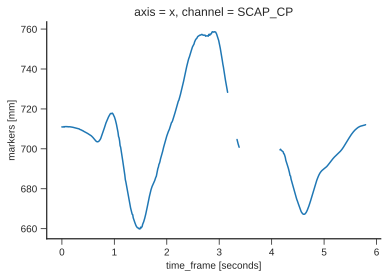

In [25]:
markers.sel(axis="x", channel="SCAP_CP").plot.line(x="time_frame");

Let's investigate those missing values

In [26]:
markers_null_values = markers.sel(axis="x").isnull()
print(f"There are {markers_null_values.sum().values} missing values")

There are 305 missing values


What are the 5 markers with the most missing values?

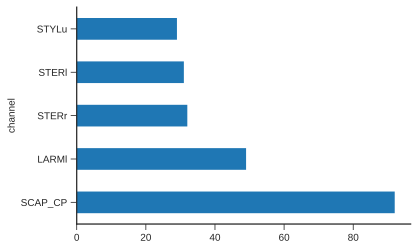

In [27]:
markers_null_values.sum(dim="time_frame").to_series().nlargest(5).plot.barh();

The cumulative number of missing values can tell us when marker occlusions occur

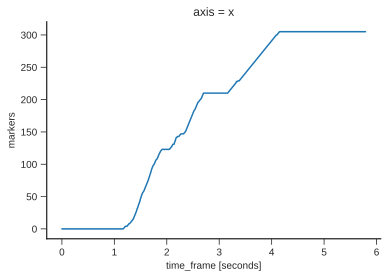

In [28]:
markers_null_values.sum("channel").cumsum("time_frame").plot();

Now that we know more about the missing values, we can use xarray for filling missing values via 1D interpolation

In [29]:
markers_without_null = markers.interpolate_na(dim="time_frame", method="cubic")

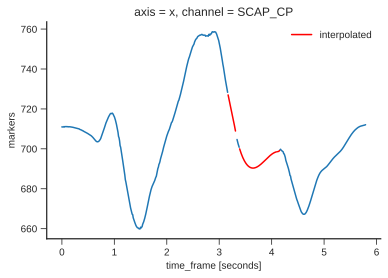

In [30]:
import matplotlib.pyplot as plt

markers.sel(axis="x", channel="SCAP_CP").plot.line(x="time_frame")
markers_without_null.where(markers.isnull()).sel(axis="x", channel="SCAP_CP").plot.line(
    x="time_frame", label="interpolated", color="r"
)
plt.legend();

#### Electromyographic pipeline

Motion implements specialized functionalities commonly used in biomechanics.

Let's proccess the electromyographic data contained in our `c3d` file.

In [31]:
from motion import Analogs

muscles = [
    "Delt_med",
    "Delt_post",
    "Biceps",
    "Triceps",
    "Trap_sup",
    "Trap_inf",
    "Gd_dent",
    "Supra",
]
emg = Analogs.from_c3d(data_path, suffix_delimiter=".", usecols=muscles)
emg.time_frame.attrs["units"] = "seconds"

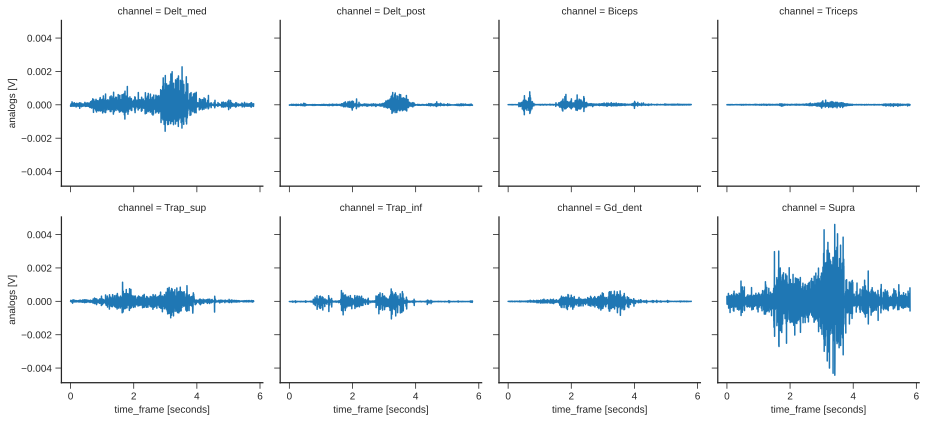

In [32]:
emg.plot(x="time_frame", col="channel", col_wrap=4);

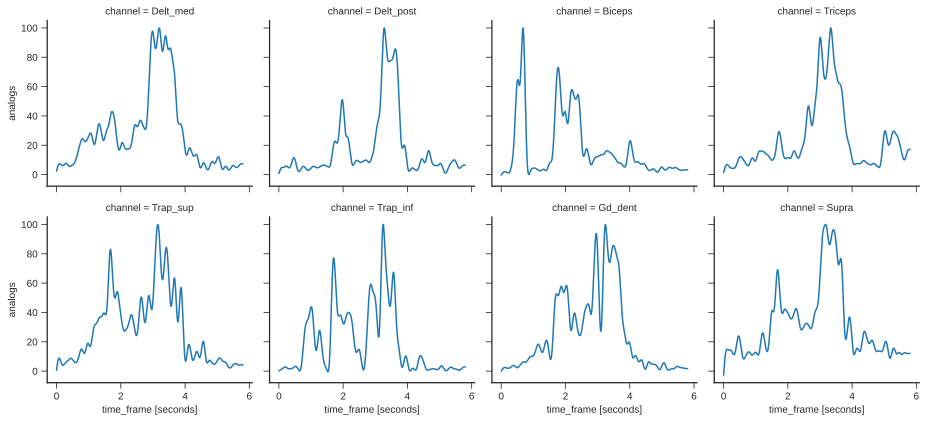

In [33]:
emg_processed = (
    emg.meca.band_pass(freq=emg.rate, order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(freq=emg.rate, order=4, cutoff=5)
    .meca.normalize()
)

emg_processed.plot(x="time_frame", col="channel", col_wrap=4);

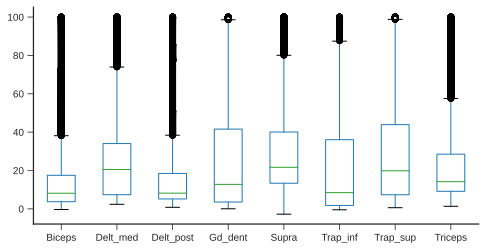

In [34]:
emg_processed.meca.to_wide_dataframe().plot.box(figsize=(8, 4));

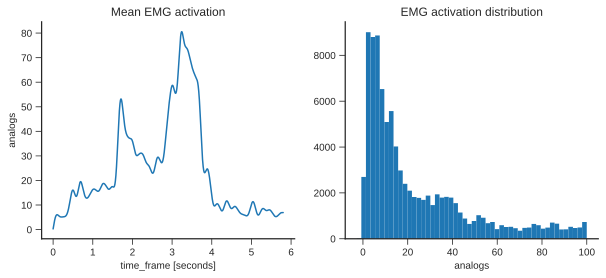

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

emg_processed.mean("channel").plot(ax=axes[0])
axes[0].set_title("Mean EMG activation")

emg_processed.plot.hist(ax=axes[1], bins=50)
axes[1].set_title("EMG activation distribution");

In [36]:
emg_processed.meca.to_wide_dataframe().corr().round(2).style.background_gradient().format("{:.2}")

channel,Biceps,Delt_med,Delt_post,Gd_dent,Supra,Trap_inf,Trap_sup,Triceps
channel,,,,,,,,
Biceps,1.0,0.01,0.04,0.18,0.12,0.2,0.16,-0.1
Delt_med,0.01,1.0,0.77,0.87,0.9,0.76,0.85,0.91
Delt_post,0.04,0.77,1.0,0.81,0.84,0.68,0.68,0.76
Gd_dent,0.18,0.87,0.81,1.0,0.85,0.84,0.82,0.8
Supra,0.12,0.9,0.84,0.85,1.0,0.76,0.91,0.83
Trap_inf,0.2,0.76,0.68,0.84,0.76,1.0,0.73,0.65
Trap_sup,0.16,0.85,0.68,0.82,0.91,0.73,1.0,0.71
Triceps,-0.1,0.91,0.76,0.8,0.83,0.65,0.71,1.0


!!! note
    For more details, see the [data processing](/data-processing/) section of the documentation.

### Datasets

Datasets are a usefull xarray feature to store multiple data arrays with common dimensions

In [37]:
import xarray as xr
import numpy as np

In [38]:
trials = xr.Dataset(
    {f"trial {i}": Analogs.from_random_data(size=(2, 100)) for i in range(10)},
    coords={
        "channel": ["biceps", "triceps"],
        "time_frame": np.arange(start=0, stop=1, step=1 / 100),
    },
)

trials

<xarray.Dataset>
Dimensions:     (channel: 2, time_frame: 100)
Coordinates:
  * channel     (channel) <U7 'biceps' 'triceps'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 ... 0.96 0.97 0.98 0.99
Data variables:
    trial 0     (channel, time_frame) float64 0.6213 1.719 0.866 ... 9.505 8.115
    trial 1     (channel, time_frame) float64 0.4762 -1.526 ... -19.32 -19.3
    trial 2     (channel, time_frame) float64 0.3844 1.646 1.07 ... 7.246 6.323
    trial 3     (channel, time_frame) float64 1.449 1.019 ... -0.7756 -0.4806
    trial 4     (channel, time_frame) float64 -0.8075 -0.8303 ... 4.079 3.83
    trial 5     (channel, time_frame) float64 0.4531 -1.098 ... 2.398 3.985
    trial 6     (channel, time_frame) float64 -1.182 -1.656 ... -2.581 -2.192
    trial 7     (channel, time_frame) float64 -2.592 -3.178 ... 15.51 15.27
    trial 8     (channel, time_frame) float64 -0.3918 -1.442 ... 25.23 26.19
    trial 9     (channel, time_frame) float64 -1.481 -2.139 ... 0.9357 1.831

We can still access the individual data arrays

In [39]:
trials["trial 1"]

<xarray.DataArray 'trial 1' (channel: 2, time_frame: 100)>
array([[  0.47623852,  -1.52647846,  -1.96738802,  -1.42058653,
         -2.50657205,  -2.39306107,  -2.38815955,  -3.96941323,
         -6.37847912,  -6.24926056,  -7.50760797,  -8.00105399,
         -7.64407712,  -8.61989586,  -7.61570536,  -7.95773563,
         -9.20630194,  -9.91979492, -10.52154282, -12.85969668,
        -13.62744403, -14.49864251, -14.43498671, -12.29269643,
        -13.02242288, -12.80080327, -11.67041621, -11.24812038,
         -9.66059498,  -9.93072116,  -9.74923083, -10.06229148,
        -11.13082113, -12.49845396, -14.237828  , -15.81771657,
        -16.44600458, -16.50841704, -17.42825405, -18.18971984,
        -16.78854839, -19.47244051, -21.28145729, -20.47938508,
        -18.33201631, -17.91306457, -17.21616681, -18.86668992,
        -18.31816582, -16.02543226, -16.64301578, -17.03206438,
        -17.42983904, -15.77192179, -13.98902039, -14.03357541,
        -13.48182332, -13.70065456, -14.33658026, -12.67135754,
        -13.53896994, -13.5048632 , -11.61352025, -11.60257998,
        -12.55901814, -13.5419003 , -14.26830579, -14.60865389,
        -14.2919254 , -15.89631716, -15.4440441 , -14.83500062,
        -16.4688737 , -17.16844731, -18.02335305, -16.197262  ,
        -17.00791146, -16.90529553, -14.86090342, -14.14735878,
        -14.83183833, -13.17862687, -13.81717689, -13.38957044,
        -13.74157632, -13.94395614, -13.12239669, -12.81361114,
        -14.77627099, -15.49713256, -14.17186861, -15.13607837,
        -15.08852131, -16.39951157, -15.69023501, -17.48194166,
        -17.89564911, -18.46966648, -19.10539655, -18.86210539],
       [ -0.07562232,  -2.13157313,  -2.52565624,  -3.16737923,
         -3.47872793,  -3.39455281,  -3.58575229,  -4.52984777,
         -2.32309177,  -1.22442814,  -0.70818375,  -1.40633073,
         -2.49285451,  -2.37423871,  -1.78166419,  -1.36713184,
         -2.04649093,  -3.05242068,  -2.49374956,  -2.94197875,
         -3.14761933,  -2.26566867,  -2.3992928 ,  -1.82904497,
         -2.6197727 ,  -4.10526706,  -3.02491866,  -3.52888903,
         -3.46395081,  -3.54457552,  -2.35200931,  -1.83294786,
         -1.38317291,  -1.10246625,  -0.63363609,  -2.59831925,
         -2.840266  ,  -4.43755361,  -3.03045171,  -2.3281822 ,
         -1.85689469,  -1.52041305,  -0.28943751,  -1.0495644 ,
         -0.13113076,  -2.76416536,  -3.33035513,  -3.26453514,
         -3.87142215,  -3.50035367,  -4.0517286 ,  -5.0390548 ,
         -4.94376262,  -3.74177457,  -5.3685079 ,  -6.03157489,
         -7.19781985,  -8.22252785,  -8.96124884, -10.46496616,
        -11.84970806, -10.06281609, -10.05809348, -11.10129014,
        -11.39836653, -12.08978453, -11.92826824, -11.33826858,
        -10.33361977, -11.26835467, -13.77656503, -12.90916429,
        -13.53178288, -13.21946147, -13.03004045, -12.9658466 ,
        -12.79456943, -14.6075092 , -14.92044819, -14.99394043,
        -17.62197044, -17.54441968, -18.32578838, -17.70853203,
        -16.47186952, -17.30728455, -18.76528554, -17.05165987,
        -17.83764451, -18.87369267, -19.35153227, -19.97146621,
        -19.85233526, -19.49087653, -19.83187261, -19.86927008,
        -18.48532508, -19.56761191, -19.32498661, -19.30402421]])
Coordinates:
  * channel     (channel) <U7 'biceps' 'triceps'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 ... 0.96 0.97 0.98 0.99

While being able to do indexing and computation on the whole dataset

In [40]:
trials.sel(channel="biceps") + 100

<xarray.Dataset>
Dimensions:     (time_frame: 100)
Coordinates:
    channel     <U7 'biceps'
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 ... 0.96 0.97 0.98 0.99
Data variables:
    trial 0     (time_frame) float64 100.6 101.7 100.9 ... 95.29 95.84 95.57
    trial 1     (time_frame) float64 100.5 98.47 98.03 ... 81.53 80.89 81.14
    trial 2     (time_frame) float64 100.4 101.6 101.1 ... 92.7 92.26 90.23
    trial 3     (time_frame) float64 101.4 101.0 101.5 ... 102.2 101.0 100.7
    trial 4     (time_frame) float64 99.19 99.17 101.0 ... 108.6 106.8 108.0
    trial 5     (time_frame) float64 100.5 98.9 99.64 ... 94.22 95.92 94.42
    trial 6     (time_frame) float64 98.82 98.34 97.76 ... 116.7 116.1 115.2
    trial 7     (time_frame) float64 97.41 96.82 96.98 97.8 ... 97.0 97.46 98.0
    trial 8     (time_frame) float64 99.61 98.56 98.87 ... 97.05 95.71 96.23
    trial 9     (time_frame) float64 98.52 97.86 98.33 ... 97.85 98.54 98.53

### File IO

NetCDF is the recommended file format to save and share xarray object.

In [41]:
emg.to_netcdf("emg.nc")

In [42]:
xr.open_dataarray("emg.nc")

<xarray.DataArray 'analogs' (channel: 8, time_frame: 11600)>
array([[-4.021073e-05, -6.808358e-05, -8.640526e-05, ...,  4.983108e-05,
         4.229912e-05,  3.812956e-05],
       [-1.361103e-05, -1.327931e-05, -1.273931e-05, ..., -2.546135e-05,
        -2.306871e-05, -1.898580e-05],
       [ 9.727633e-06,  9.567407e-06,  9.567407e-06, ...,  9.903105e-06,
         1.118365e-05,  1.182195e-05],
       ...,
       [-9.918351e-06, -1.089098e-05, -1.067791e-05, ..., -1.001964e-06,
        -1.264539e-05, -1.919743e-05],
       [-2.296531e-06, -9.303800e-07, -1.047933e-06, ...,  1.562380e-06,
         2.389907e-06,  3.062012e-06],
       [ 2.975303e-04,  1.551703e-04,  3.527764e-05, ..., -2.581336e-04,
        -4.462923e-04, -5.757854e-04]])
Coordinates:
  * time_frame  (time_frame) timedelta64[ns] 00:00:00 ... 00:00:05.799500
  * channel     (channel) object 'Delt_med' 'Delt_post' ... 'Gd_dent' 'Supra'
Attributes:
    first_frame:  0
    last_frame:   11580
    rate:         2000.0
    units:        V

In [43]:
trials.to_netcdf("trials.nc")

In [44]:
import xarray as xr
xr.open_dataset("trials.nc")

<xarray.Dataset>
Dimensions:     (channel: 2, time_frame: 100)
Coordinates:
  * time_frame  (time_frame) float64 0.0 0.01 0.02 0.03 ... 0.96 0.97 0.98 0.99
  * channel     (channel) object 'biceps' 'triceps'
Data variables:
    trial 0     (channel, time_frame) float64 ...
    trial 1     (channel, time_frame) float64 ...
    trial 2     (channel, time_frame) float64 ...
    trial 3     (channel, time_frame) float64 ...
    trial 4     (channel, time_frame) float64 ...
    trial 5     (channel, time_frame) float64 ...
    trial 6     (channel, time_frame) float64 ...
    trial 7     (channel, time_frame) float64 ...
    trial 8     (channel, time_frame) float64 ...
    trial 9     (channel, time_frame) float64 ...

Motion implements function to read various file format commonly used in biomechanics such as `c3d`, `csv`, `xlsx`, `sto`, `trc` and `mot`.

Users can also write Matlab and csv files.

In [45]:
emg.meca.to_matlab("emg.mat")

In [46]:
emg.meca.to_csv("emg.csv")

In [47]:
# ignore_cell
from pathlib import Path

files = ["emg.mat", "emg.csv", "emg.nc", "trials.nc"]

for file in files:
    Path(file).unlink()